In this notebook I'll be exploring and visualizing United States tornado data collected 1950-2021.
Data was downloaded from 
https://www.kaggle.com/datasets/danbraswell/us-tornado-dataset-1950-2021
on 5/2/24.

From Kaggle:
In the US, tornadoes were originally rated on the Fujita Scale, and since February 2007 on the Enhanced Fujita Scale. The two scales cover slightly different speed ranges, but for practical purposes are the same. The enhanced Fujita scale is shown below.

| Rating	|Wind Speed	| Damage
| ----      | -----     | -----
|EF0	    |65–85 mph	|Light damage
|EF1	    |86–110 mph	|Moderate damage
|EF2	    |111–135 mph	|Considerable damage
|EF3	    |136–165 mph	|Severe damage
|EF4	    |166–200 mph	|Devastating damage
|EF5	    |>200 mph	|Incredible damage


Column definitions:

|Term  | Definition
|---- | ----
|yr | 4-digit year
|mn | Month (1-12)
|dy | Day of month
|date | Datetime object (e.g. 1950-01-01)
|st | State where tornado originated; 2-digit abbreviation
|mag | F rating thru Jan 2007; EF rating after Jan 2007 (-9 if unknown rating)
|inj | Number of injuries
|fat | Number of fatalities
|slat | Starting latitude in decimal degrees
|slon | Starting longitude in decimal degrees
|elat | Ending latitude in decimal degrees (value of 0 if missing)
|elon | Ending longitude in decimal degrees (value of 0 if missing)
|len | Length of track in miles
|wid | Width in yards


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('us_tornado_dataset_1950_2021.csv')
df.head()

,yr,mo,dy,date,st,mag,inj,fat,slat,slon,elat,elon,len,wid
0,1950,1,3,1950-01-03,IL,3,3,0,39.10,-89.30,39.12,-89.23,3.6,130
1,1950,1,3,1950-01-03,MO,3,3,0,38.77,-90.22,38.83,-90.03,9.5,150
2,1950,1,3,1950-01-03,OH,1,1,0,40.88,-84.58,0.00,0.00,0.1,10
3,1950,1,13,1950-01-13,AR,3,1,1,34.40,-94.37,0.00,0.00,0.6,17
4,1950,1,25,1950-01-25,IL,2,0,0,41.17,-87.33,0.00,0.00,0.1,100


In [3]:
#Check if data contains nulls
df.isnull().sum()

yr      0
mo      0
dy      0
date    0
st      0
mag     0
inj     0
fat     0
slat    0
slon    0
elat    0
elon    0
len     0
wid     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67558 entries, 0 to 67557
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   yr      67558 non-null  int64  
 1   mo      67558 non-null  int64  
 2   dy      67558 non-null  int64  
 3   date    67558 non-null  object 
 4   st      67558 non-null  object 
 5   mag     67558 non-null  int64  
 6   inj     67558 non-null  int64  
 7   fat     67558 non-null  int64  
 8   slat    67558 non-null  float64
 9   slon    67558 non-null  float64
 10  elat    67558 non-null  float64
 11  elon    67558 non-null  float64
 12  len     67558 non-null  float64
 13  wid     67558 non-null  int64  
dtypes: float64(5), int64(7), object(2)
memory usage: 7.2+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
yr,67558.0,1991.341618,19.330015,1950.0000,1976.0000,1994.00,2008.00,2021.0000
mo,67558.0,5.976761,2.438192,1.0000,4.0000,6.00,7.00,12.0000
dy,67558.0,15.921016,8.736773,1.0000,8.0000,16.00,24.00,31.0000
mag,67558.0,0.691273,1.283375,-9.0000,0.0000,1.00,1.00,5.0000
inj,67558.0,1.437876,18.263956,0.0000,0.0000,0.00,0.00,1740.0000
fat,67558.0,0.090470,1.484106,0.0000,0.0000,0.00,0.00,158.0000
slat,67558.0,37.142412,5.093979,17.7212,33.2200,37.03,40.93,61.0200
slon,67558.0,-92.784618,8.689103,-163.5300,-98.4500,-93.60,-86.73,-64.7151
elat,67558.0,22.730695,18.588638,0.0000,0.0000,32.48,38.61,61.0200
elon,67558.0,-56.245590,45.489157,-163.5300,-94.7098,-84.42,0.00,0.0000


Half the entries in this dataset occurred in/after 1994. If tornado observations were evenly distributed through the years, we'd expect the mean to be 1985. Most tornados cause no injuries and no fatalities. Maximum recorded width of a tornado was 4,576 yards (=2.6 miles = 4.2 km)! However, the 'mag' column needs a closer look: I wouldn't expect a tornado to have a rating of -9.

In [6]:
df['mag'].unique()

array([ 3,  1,  2,  4,  0,  5, -9])

In [7]:
df.loc[df['mag'] == -9]

,yr,mo,dy,date,st,mag,inj,fat,slat,slon,elat,elon,len,wid
60343,2016,4,15,2016-04-15,CO,-9,0,0,38.3743,-102.8185,38.4299,-102.8225,3.85,150
60344,2016,4,15,2016-04-15,CO,-9,0,0,38.4046,-102.8083,38.4118,-102.8082,0.50,100
60345,2016,4,15,2016-04-15,CO,-9,0,0,38.4773,-102.7234,38.4944,-102.7191,1.20,100
60346,2016,4,15,2016-04-15,CO,-9,0,0,38.1773,-102.7907,38.1852,-102.7865,0.59,100
60480,2016,5,8,2016-05-08,OK,-9,0,0,34.5810,-98.0760,34.5810,-98.0530,1.30,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67417,2021,12,15,2021-12-15,IA,-9,0,0,41.9551,-95.5749,42.0074,-95.5266,4.39,50
67418,2021,12,15,2021-12-15,IA,-9,0,0,42.5620,-95.4050,42.5850,-95.3880,1.81,50
67419,2021,12,15,2021-12-15,IA,-9,0,0,42.2525,-94.6317,42.2708,-94.6236,1.33,40
67420,2021,12,15,2021-12-15,IA,-9,0,0,42.5797,-94.5775,42.5920,-94.5657,1.04,40


Further reading indicates that these 605 rows have unknown magnitude. I will drop them as they comprise less than 1% of the data.

In [8]:
df2 = df.loc[df['mag'] != -9]
df2.shape

(66953, 14)

In [9]:
df2['mag'].unique()

array([3, 1, 2, 4, 0, 5])

Additionally, wid = 0 indicates unknown width, and elat and elon are sometimes 0 to denote unknown values. I'll use slat and slon for analysis instead of elat/elon and will check whether wid = 0 can be dropped.

In [10]:
df2.loc[df2['wid'] == 0]

,yr,mo,dy,date,st,mag,inj,fat,slat,slon,elat,elon,len,wid
39176,1999,1,1,1999-01-01,LA,1,0,0,32.42,-93.62,32.43,-93.62,1.1,0
39177,1999,1,1,1999-01-01,LA,2,1,0,32.38,-93.80,32.37,-93.73,3.2,0
39179,1999,1,1,1999-01-01,TX,0,1,0,30.85,-95.42,30.85,-95.42,0.3,0
39180,1999,1,1,1999-01-01,TX,0,0,0,30.72,-95.37,30.72,-95.37,0.3,0
39186,1999,1,1,1999-01-01,TX,1,7,0,30.75,-95.53,30.77,-95.50,2.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48221,2006,1,13,2006-01-13,GA,0,0,0,30.92,-81.65,30.92,-81.65,0.1,0
48561,2006,4,14,2006-04-14,CA,1,0,0,37.65,-121.00,37.65,-121.00,0.5,0
48800,2006,6,8,2006-06-08,UT,0,0,0,38.98,-110.22,38.98,-110.22,0.5,0
48967,2006,7,29,2006-07-29,GA,0,0,0,31.85,-81.60,31.85,-81.60,0.0,0


Only 473 tornados lack width data; ok to drop.

In [11]:
df3 = df2.loc[df2['wid'] != 0]
df3.shape

(66480, 14)

In [1]:
color_scale = [(0, 'yellow'), (1,'red')]

fig = px.scatter_mapbox(df3, 
                        lat="slat", 
                        lon="slon", 
                        hover_name="mag", 
                        hover_data=["mag", "inj","fat"],
                        color="mag",
                        color_continuous_scale=color_scale,
                        size="wid",
                        zoom=3, 
                        height=500,
                        width=500)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show('png')

NameError: name 'px' is not defined

The above map is interesting but a little too crowded to be very informative. We can see, however, that most tornados are less severe with smaller widths and are concentrated in the midwest and eastern USA. Let's look at just EF 4 and 5 tornados next

In [13]:
df_EF45 = df3.loc[df3['mag'] >= 4]
df_EF45.shape

(640, 14)

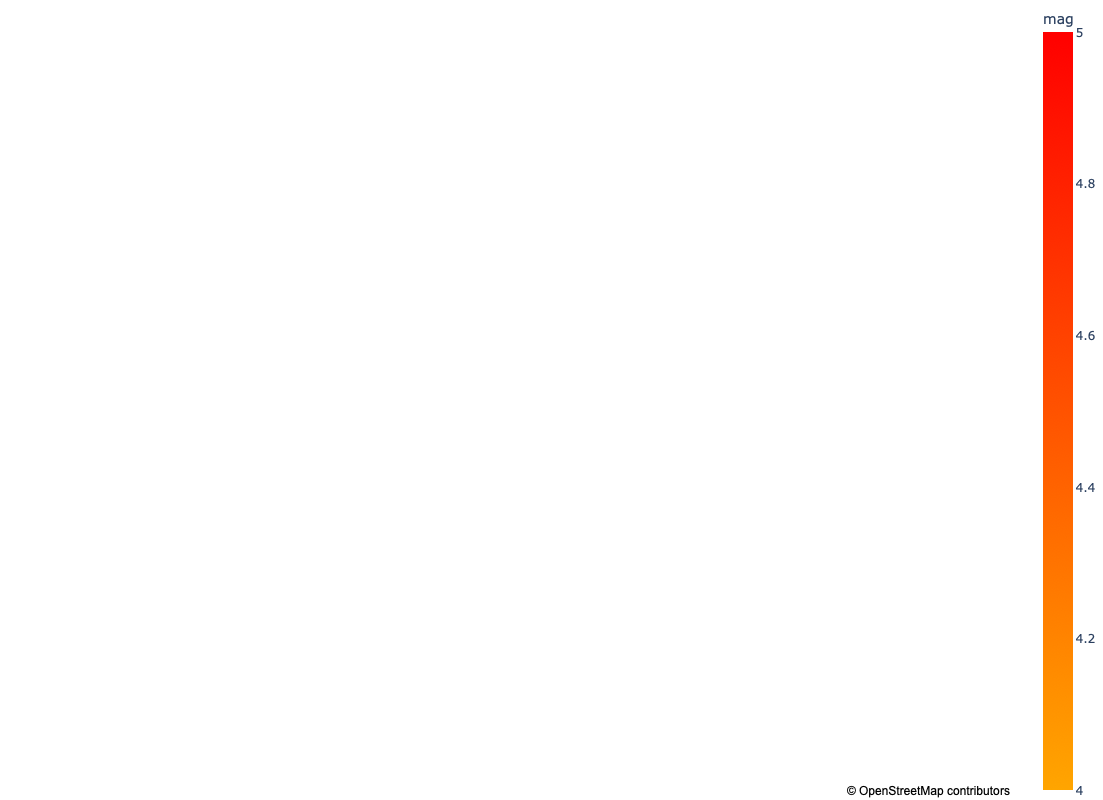

In [14]:
color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(df_EF45, 
                        lat="slat", 
                        lon="slon", 
                        hover_name="mag", 
                        hover_data=["mag", "inj","fat"],
                        color="mag",
                        color_continuous_scale=color_scale,
                        size="wid",
                        zoom=3, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

This map shows that more severe tornados, as expected, have wider paths and are concentrated in Tornado Alley, but also in the American southeast. I'll now use color to indicate time to investigate shifts in tornado location.

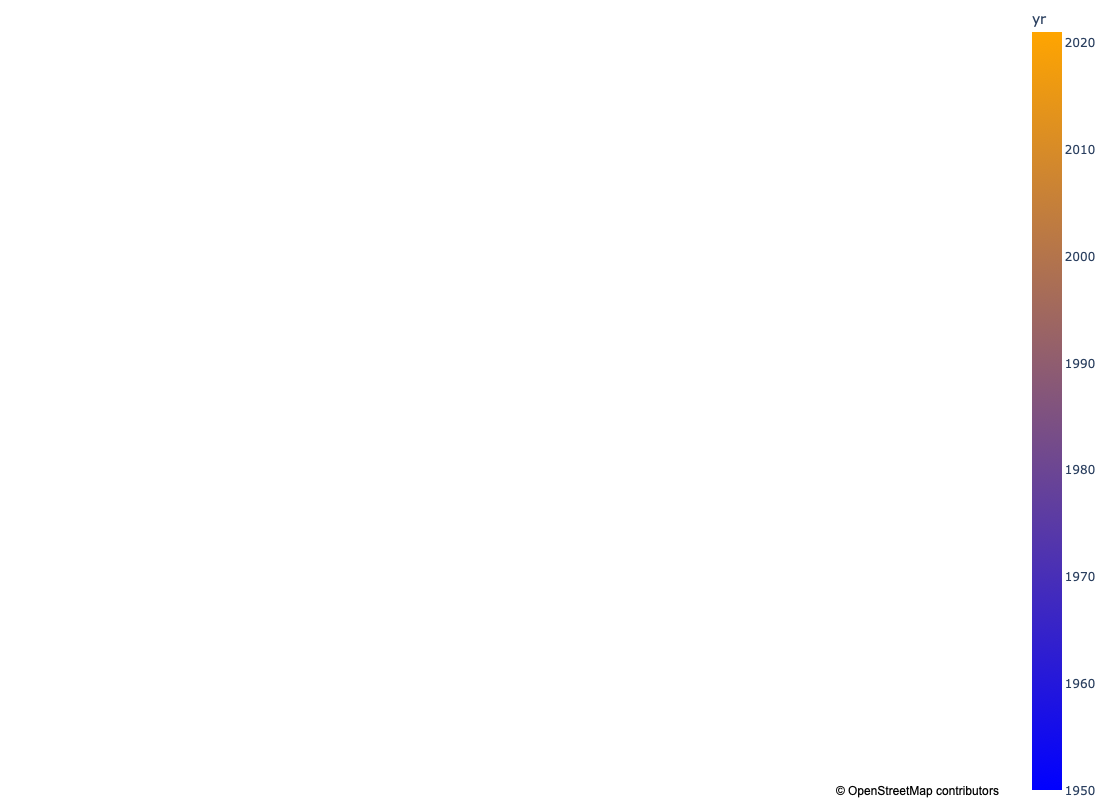

In [15]:
color_scale = [(0, 'blue'), (1,'orange')]

fig = px.scatter_mapbox(df_EF45, 
                        lat="slat", 
                        lon="slon", 
                        hover_name="mag", 
                        hover_data=["mag", "inj","fat"],
                        color="yr",
                        color_continuous_scale=color_scale,
                        size="wid",
                        zoom=3, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Over time, tornado width looks like it's increasing and it looks like Tornado Alley has moved from the midwest to the south.

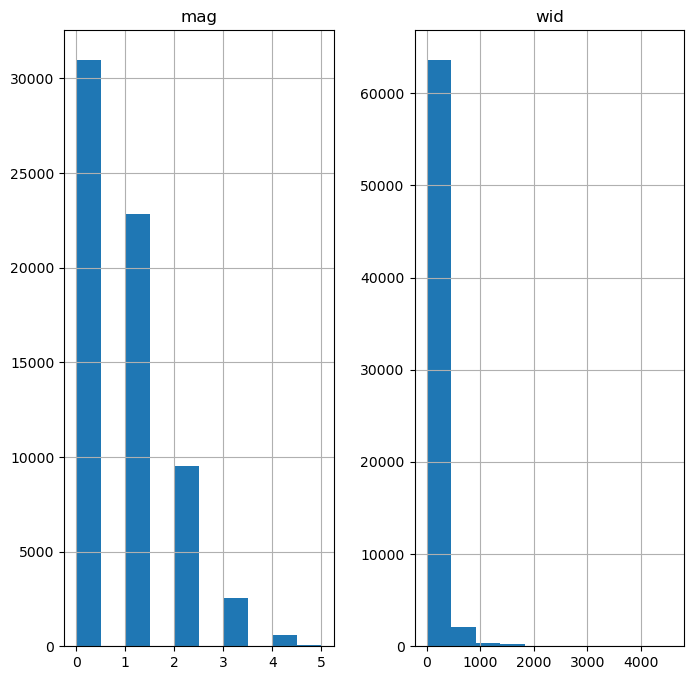

In [16]:
df3[['mag','wid']].hist(figsize = (8,8))
plt.show()

Most tornados are low on the EF scale and are narrow. How has tornado width and intensity changed through time?

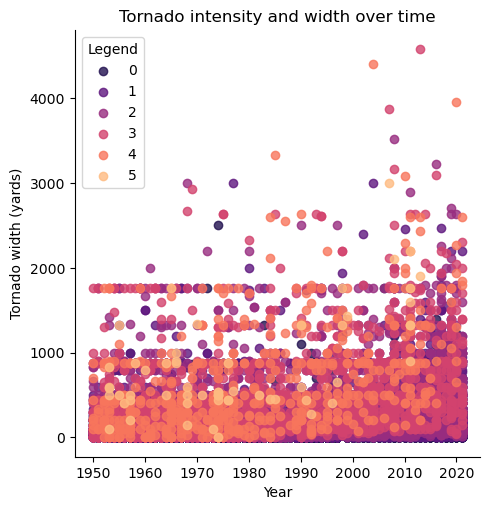

In [17]:
sns.lmplot(
    x = 'yr', 
    y =  'wid',
    data = df3,
    hue = 'mag',
    legend = False,
    fit_reg = False,
    palette='magma'
    )

plt.title("Tornado intensity and width over time")
plt.xlabel("Year")
plt.ylabel("Tornado width (yards)")
plt.legend(title = 'Legend', loc = 'upper left', labels = ['0','1','2','3','4','5']);
plt.show();

This scatterplot of all data has too much information to be very useful; the dots may be layered in a misleading way. Again, let's just look at EF 4 & 5 tornados over time. It does look like there's a lot of tornados with width = approximately 1750; perhaps this was used as a marker in the dataset. If I were cleaning this dataset I'd investigate some of the horizontal linear trends.

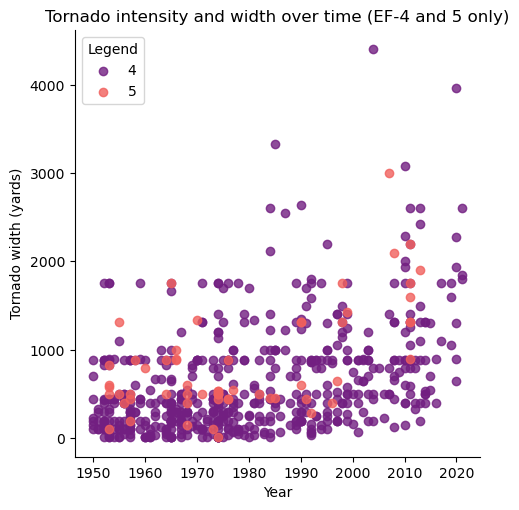

In [18]:
sns.lmplot(
    x = 'yr', 
    y =  'wid',
    data = df_EF45,
    hue = 'mag',
    legend = False,
    fit_reg = False,
    palette='magma'
    )

plt.title("Tornado intensity and width over time (EF-4 and 5 only)")
plt.xlabel("Year")
plt.ylabel("Tornado width (yards)")
plt.legend(title = 'Legend', loc = 'upper left', labels = ['4','5']);
plt.show();

More severe tornados appear to be getting wider over time. I'll pare down the data to just the most severe storms to see if I can clarify the trend further

In [19]:
df_EF5 = df3.loc[df3['mag'] == 5]
df_EF5.shape

(59, 14)

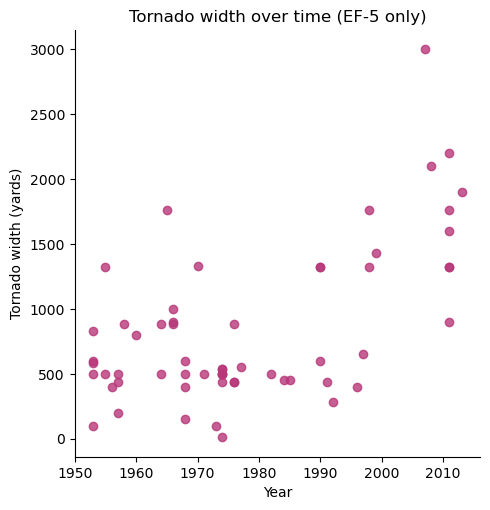

In [20]:
sns.lmplot(
    x = 'yr', 
    y =  'wid',
    data = df_EF5,
    hue = 'mag',
    legend = False,
    fit_reg = False,
    palette='magma'
    )

plt.title("Tornado width over time (EF-5 only)")
plt.xlabel("Year")
plt.ylabel("Tornado width (yards)")
plt.show();

F5 tornados show a clear positive size trend over time, noticeable after about 1990.